In [1]:
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_anage = pl.read_csv("../../data/anage.csv", ignore_errors=True)
df_earthq = (pl.read_csv("../../data/EarthquakesChile_2000-2024.csv")
             .with_columns(date = pl.col("Date").cast(pl.Date()))
             .with_columns(year = pl.col("date").dt.year(),
                           month = pl.col("date").dt.strftime("%B")#.month()
                           )
             )

sorted_regions = [
'Arica y Parinacota',
'Tarapacá',
'Antofagasta',
'Atacama',
'Coquimbo',
'Valparaíso',
'Santiago Metropolitan',
"Libertador General Bernardo O'Hi",
'Maule',
'Ñuble',
'Bío-Bío',
'Araucanía',
'Los Ríos',
'Los Lagos',
'Aysén del General Ibañez del Cam',
'Magallanes y Antártica Chilena'
]

In [63]:
df_earthq

UTC_Date,Profoundity_Km,Magnitude_Ml,Date,Hour,Location,Region,Latitude,Longitude,date,year,month
str,f64,f64,str,str,str,str,f64,f64,date,i32,str
"""2024-03-01 16:35:22""",243.0,2.9,"""2024-03-01""","""13:35:22""","""45 km al SE de Socaire""","""Antofagasta""",-23.958,-67.698,2024-03-01,2024,"""March"""
"""2024-03-01 15:41:03""",259.0,3.6,"""2024-03-01""","""12:41:03""","""57 km al E de Socaire""","""Antofagasta""",-23.8,-67.375,2024-03-01,2024,"""March"""
"""2024-03-01 08:27:13""",26.0,2.9,"""2024-03-01""","""05:27:13""","""33 km al S de Huasco""","""Atacama""",-28.755,-71.288,2024-03-01,2024,"""March"""
"""2024-03-01 08:22:21""",54.0,3.7,"""2024-03-01""","""05:22:21""","""49 km al SO de Huasco""","""Atacama""",-28.822,-71.52,2024-03-01,2024,"""March"""
"""2024-03-01 07:12:58""",20.0,2.9,"""2024-03-01""","""04:12:58""","""16 km al SE de Los Vilos""","""Coquimbo""",-31.991,-71.376,2024-03-01,2024,"""March"""
…,…,…,…,…,…,…,…,…,…,…,…
"""2001-01-03 12:27:54""",33.0,5.0,"""2001-01-03""","""09:27:54""","""79 km al NO de Navidad""","""Valparaíso""",-33.502,-72.496,2001-01-03,2001,"""January"""
"""2001-01-01 11:56:26""",38.0,4.6,"""2001-01-01""","""08:56:26""","""171 km al SO de TirÃºa""","""Bío-Bío""",-39.066,-75.233,2001-01-01,2001,"""January"""
"""2000-11-14 17:39:18""",37.0,3.4,"""2000-11-14""","""14:39:18""","""56 km al SO de Huasco""","""Atacama""",-28.877,-71.548,2000-11-14,2000,"""November"""


#### Crea un gráfico de barras agrupadas que muestre la temperatura en grados Celsius por clase y origen de los animales del dataset anage. Personaliza los colores de las barras utilizando alguna paleta de colores predefinida.

<Axes: xlabel='Class', ylabel='Temperature (C)'>

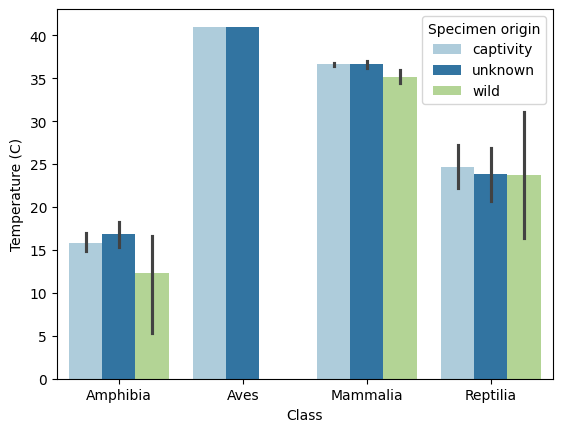

In [35]:
df_anage_subset = (df_anage
                   .select("Class","Specimen origin","Temperature (K)")
                   .drop_nulls(subset="Temperature (K)")
                   .with_columns((pl.col("Temperature (K)")-273.15).alias("Temperature (C)"))
                   
                    )
sns.barplot(df_anage_subset, x="Class", y="Temperature (C)", hue="Specimen origin", palette = "Paired")

#### Muestra el sismo de mayor magnitud en cada región para los años 2010, 2011 y 2012. Primero, ajusta los colores utilizando códigos hexadecimales y, a continuación, genera nuevamente el gráfico empleando alguna paleta de colores predefinida. Explora diferentes formas de realizar la visualización.

In [36]:
df_max_magnitude = (df_earthq
 .select("Region","year","Magnitude_Ml")
 .filter(pl.col("year").is_between(2010,2012))
 .group_by("Region","year")
 .max()
 )

<Axes: xlabel='Magnitude_Ml', ylabel='Region'>

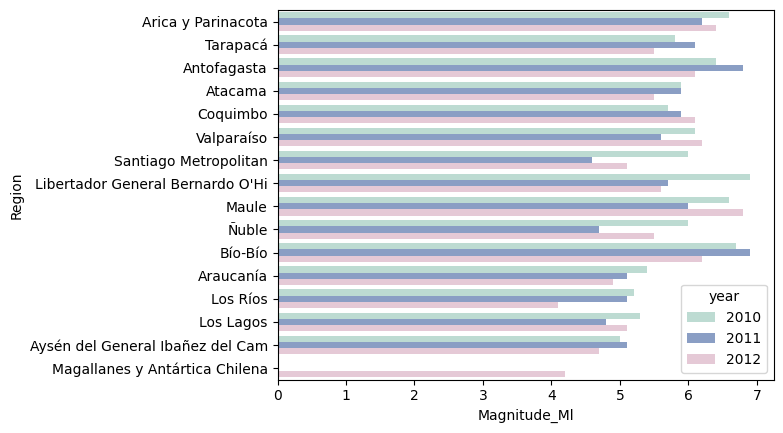

In [37]:
sns.barplot(df_max_magnitude, x="Magnitude_Ml",y="Region", hue="year", order=sorted_regions, palette=["#b8e0d4","#809bce","#eac4d5"])

<Axes: xlabel='Magnitude_Ml', ylabel='Region'>

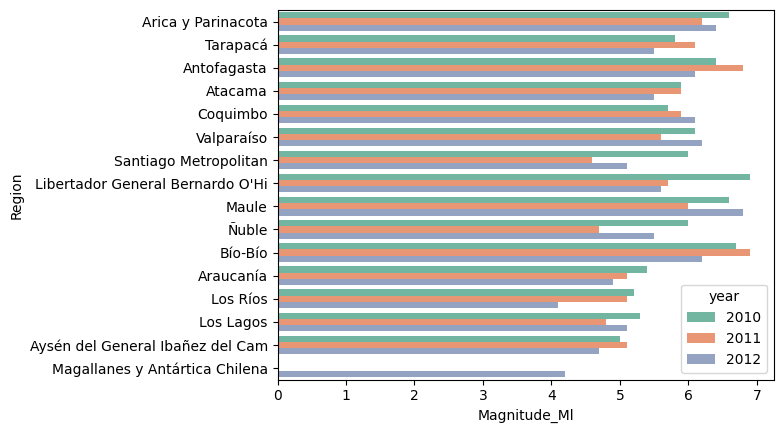

In [38]:
sns.barplot(df_max_magnitude, x="Magnitude_Ml",y="Region", hue="year", order=sorted_regions, palette="Set2")

In [ ]:
df_max_magnitude_pivot = df_max_magnitude.pivot(on="year", index="Region")
df_max_magnitude_pivot = df_max_magnitude_pivot.with_columns(
    pl.col("Region").cast(pl.Enum(sorted_regions))
).sort('Region')

<Axes: >

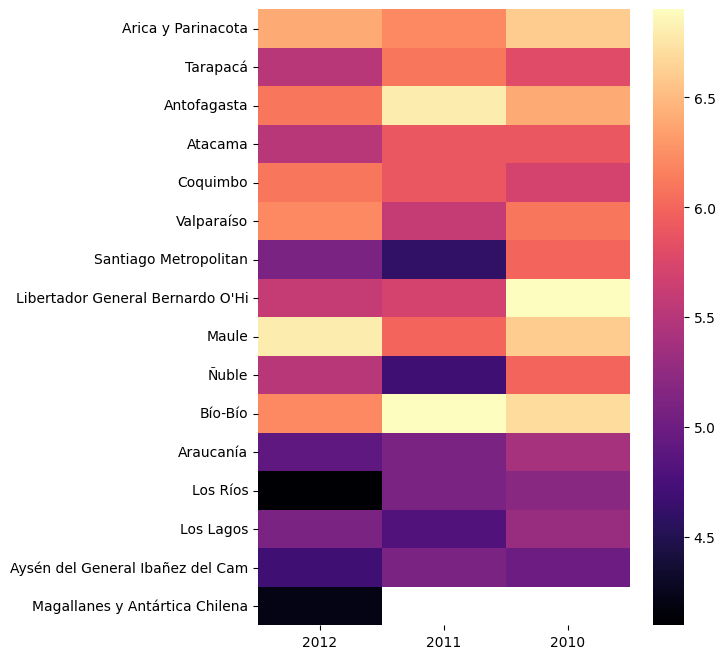

In [40]:
plt.figure(figsize=(6,8))
sns.heatmap(df_max_magnitude_pivot.drop("Region"),
            xticklabels=df_max_magnitude_pivot.drop("Region").columns,
            yticklabels=df_max_magnitude_pivot["Region"].to_list(),
            cmap="magma"
            )

#### Utiliza un gráfico de torta para mostrar la proporción de sismos por región con magnitud mayor o igual a 4 en el año 2012. Incluye los nombres de las regiones en cada sector del gráfico y oculta los porcentajes que no sean relevantes. Además, crea una paleta de colores personalizada basada en alguna de las paletas cualitativas disponibles.

([<matplotlib.patches.Wedge at 0x7b5f6aecec10>,
 [Text(1.071089178812541, 0.25053536882180316, 'Bío-Bío'),
  Text(0.9138592669440276, 0.6122591283276425, 'Valparaíso'),
  Text(0.8057922591146333, 0.7487982606489788, 'Ñuble'),
  Text(0.7816597444928683, 0.7739560994264106, 'Magallanes y Antártica Chilena'),
  Text(0.6775328362046217, 0.8665732836087905, "Libertador General Bernardo O'Hi"),
  Text(0.3157927567705633, 1.0536958454749872, 'Maule'),
  Text(-0.23991522166087204, 1.073517902233314, 'Atacama'),
  Text(-0.6775330152664383, 0.8665731436087599, 'Arica y Parinacota'),
  Text(-1.000841842613599, -0.45641604493468035, 'Antofagasta'),
  Text(0.015252066862774824, -1.0998942560339215, 'Aysén del General Ibañez del Cam'),
  Text(0.023966622372716153, -1.0997388785580164, 'Los Ríos'),
  Text(0.42648167982998364, -1.0139592579435306, 'Tarapacá'),
  Text(0.7755032586075803, -0.7801247950738552, 'Los Lagos'),
  Text(0.8291159263215216, -0.7228878064540896, 'Santiago Metropolitan'),
  Text(

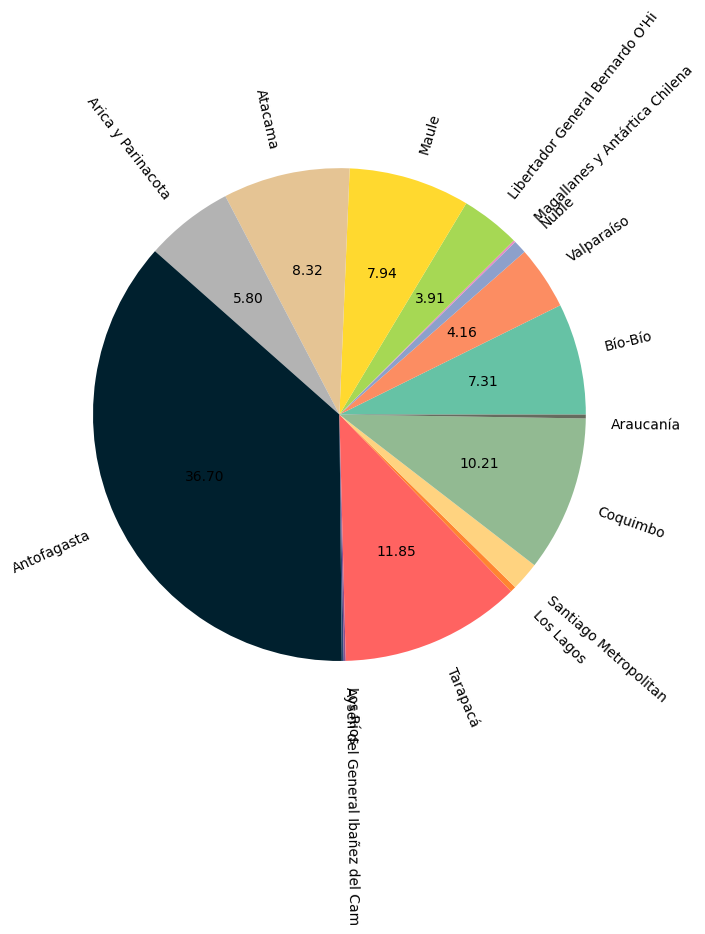

In [41]:
def autopct(pct):
    if(pct>3): 
        return '%.2f' % pct
    else:
        return ""

palette = sns.color_palette("Set2").as_hex() + ['#00202e', '#2c4875', '#8a508f', '#ff6361', 
                '#ff8531', '#ffd380', '#92ba92', '#666b5e']
    
df_earthq_2015 = df_earthq.filter((pl.col("year")==2012) & (pl.col("Magnitude_Ml")>=4))
df_earthq_2015 = df_earthq_2015.group_by("Region").len() 

plt.figure(figsize=(12,8))
plt.pie(df_earthq_2015["len"], labels=df_earthq_2015["Region"], rotatelabels=True, autopct=autopct, colors=palette)


#### Utilizando el dataset anage, clasifica las especies según el peso (Adult weight (g)) en las siguientes categorías:
- Menor a 10 g → Muy pequeño
- Menor a 1000 g → Pequeño
- Menor a 100000 g → Mediano
- Mayor o igual a 100000 g → Grande

Crea un heatmap que muestre la relación entre los órdenes de las especies, la cantidad de camadas por año (Litters/Clutches per year) y el  peso categorizado. Utiliza una paleta de colores adecuada.

<Axes: >

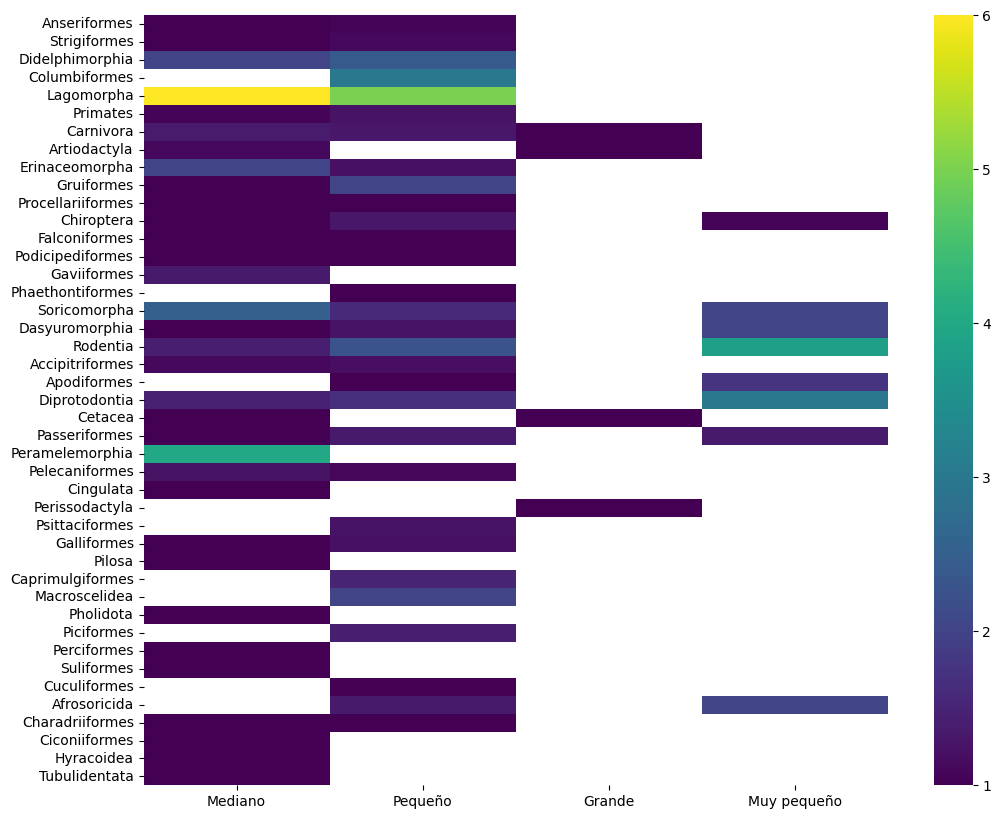

In [42]:
df_anage_weight_cat = df_anage.drop_nulls(subset="Adult weight (g)").with_columns(pl.when(pl.col("Adult weight (g)")<10)
                      .then(pl.lit("Muy pequeño"))
                      .when(pl.col("Adult weight (g)")<1000)
                      .then(pl.lit("Pequeño"))
                      .when(pl.col("Adult weight (g)")<100000)
                      .then(pl.lit("Mediano"))
                      .otherwise(pl.lit("Grande"))
                      .alias("weight_categorization")
                      )
df_anage_weight_cat = (df_anage_weight_cat
                       .select("weight_categorization","Order","Litters/Clutches per year")
                       .drop_nulls(subset=["Litters/Clutches per year"])
                       .group_by("weight_categorization","Order")
                       .mean()
                       .pivot(index="Order",on="weight_categorization")
                       )
plt.figure(figsize=(12,10))
sns.heatmap(df_anage_weight_cat.drop("Order"),
            xticklabels=df_anage_weight_cat.drop("Order").columns,
            yticklabels=df_anage_weight_cat["Order"].to_list(),
            cmap="viridis"
            )

#### A partir de la misma información del punto anterior, genera un clustermap. Cambia la métrica de distancia para explorar posibles cambios en la agrupación. Usa la misma paleta de colores que en el heatmap anterior, pero invertida. Además, asigna un color a cada familia según el orden al que pertenece.

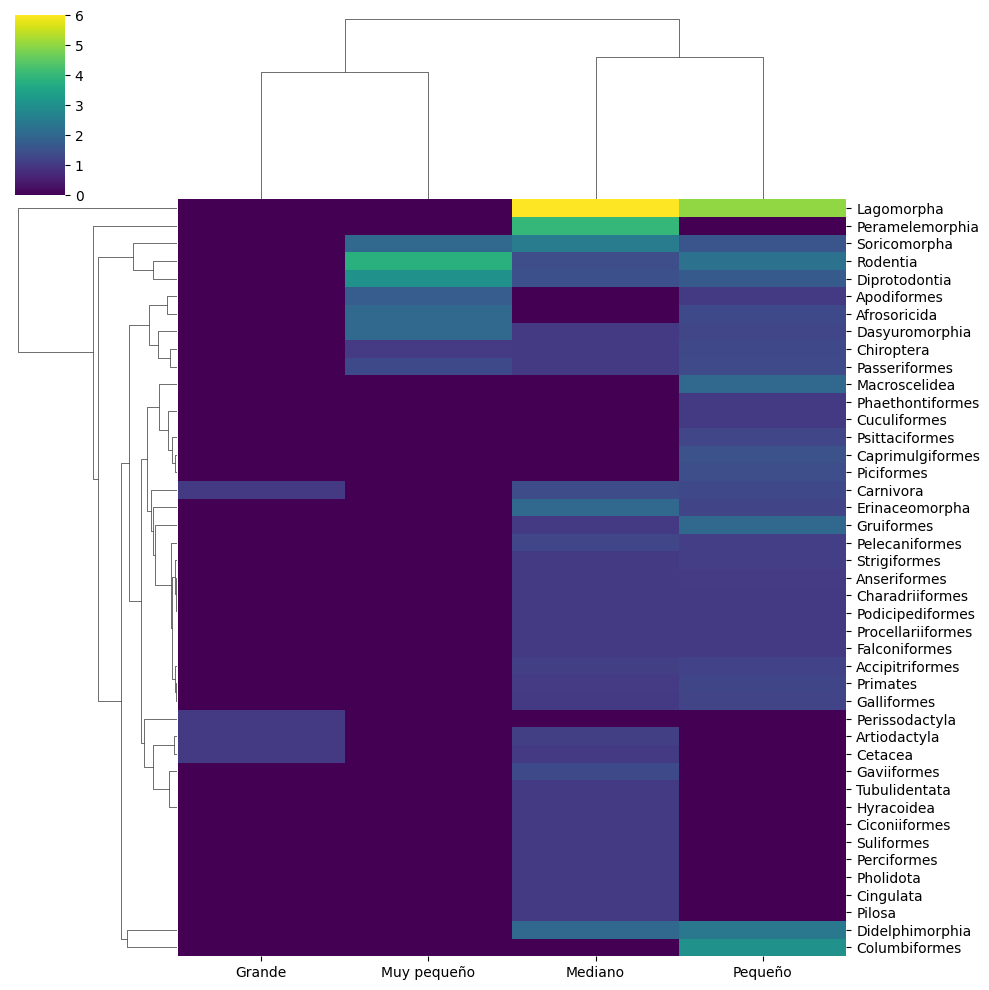

In [ ]:
sns.clustermap(df_anage_weight_cat.fill_null(0).drop("Order"),
                xticklabels=df_anage_weight_cat.drop("Order").columns,
                yticklabels=df_anage_weight_cat["Order"].to_list(),
                cmap="viridis"
               )

#### Utilizando el dataset de sismos, presenta mediante un heatmap, el promedio de magnitud de sismos en cada región por mes del año 2005. Ordena las filas según la ubicación geográfica y las columnas por mes ordenados temporalmente. Selecciona una paleta de colores adecuada e incluye un título, así como etiquetas para los ejes X y Y y para la escala de color. Genera dos visualizaciones: una utilizando el dataset completo, sin modificar los valores nulos, y otra completando los valores nulos con algún valor que estimes conveniente.

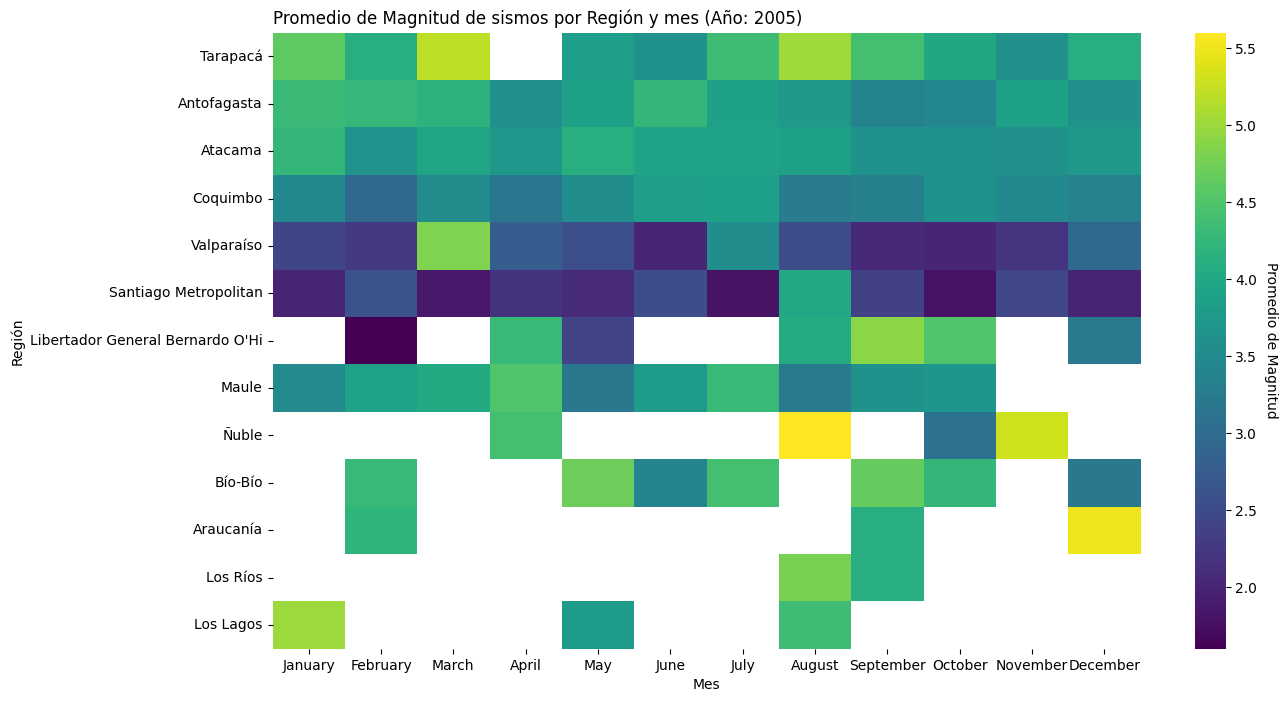

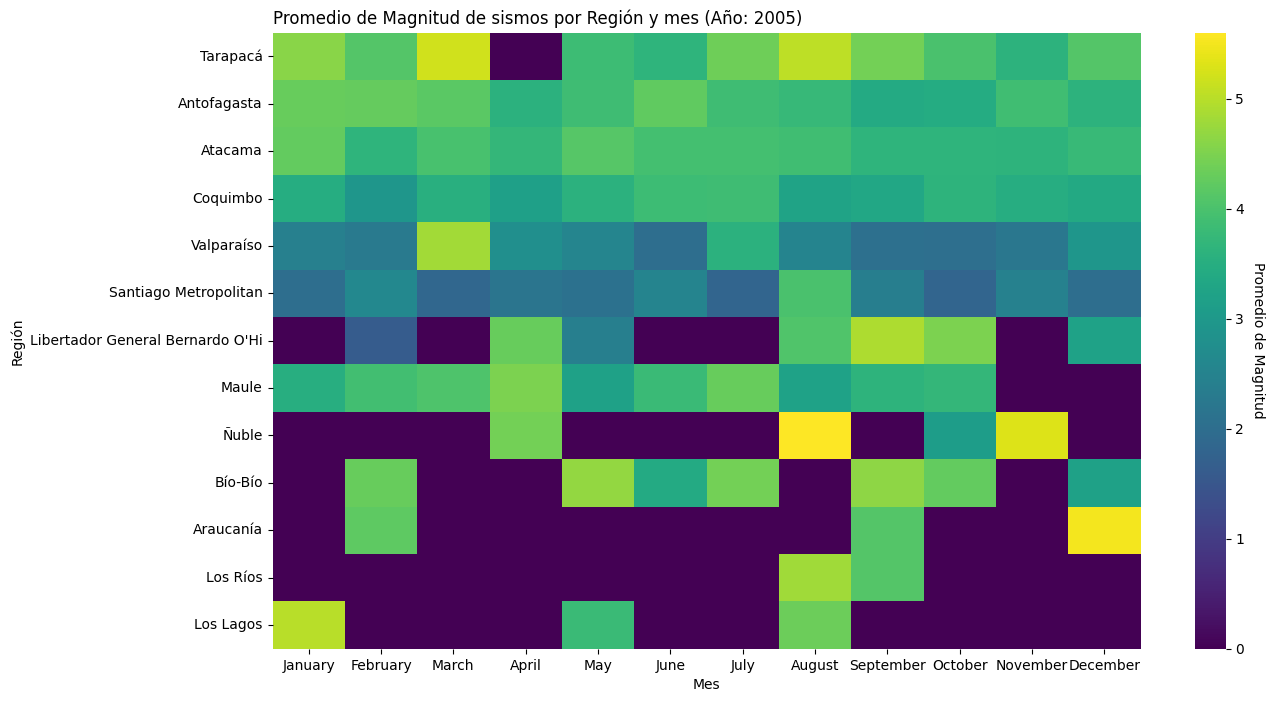

In [41]:

df_earthq_month = (df_earthq
    .filter(pl.col("year") == 2005)        
    .select("Region","month","Magnitude_Ml")
    .group_by("Region","month")
    .mean()
    .with_columns(pl.col("Region").cast(pl.Enum(sorted_regions)))
    .pivot(index="Region",on="month", maintain_order=True)
).sort("Region")

def show_heatmap(df):
    df_pivot = df.sort("Region").select(["Region",'January','February','March','April','May','June','July','August','September','October','November','December'])

    plt.figure(figsize=(14,8))
    ax = sns.heatmap(df_pivot.drop("Region"),
                xticklabels=df_pivot.drop("Region").columns,
                yticklabels=df_pivot["Region"].to_list(),
                cmap="viridis",
    )
    plt.title("Promedio de Magnitud de sismos por Región y mes (Año: 2005)", loc="left")
    plt.xlabel("Mes")
    plt.ylabel("Región")
    plt.xticks(rotation=0, ha="center")
    cbar = ax.collections[0].colorbar
    cbar.set_label("Promedio de Magnitud", rotation=-90, labelpad=15)



    
show_heatmap(df_earthq_month)
show_heatmap(df_earthq_month.fill_null(0))

